In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
class RandomForestExample():
    def __init__(self,filename):
        # reading the data from the csv file
         self.spam_data_df = pd.read_csv(filename)
            
    def getDF(self):
        return self.spam_data_df
            
    def addLengthCol(self):
        self.spam_data_df['length'] = self.spam_data_df['message'].apply(len)
        
    def textVectorize(self,input_text):
        input_text = input_text.translate(str.maketrans('', '', string.punctuation))
        input_text = [word for word in input_text.split() if word.lower() not in stopwords.words('english')]
        return " ".join(input_text)
    
    def train(self,model,data_train,labels):    
        model = model.fit(data_train, labels)
        return model
    
    def predict_labels(self,model, features):
        model = model.predict(features)
        return model

In [3]:
rfe = RandomForestExample('SMSSpamCollection.csv')
rfe.getDF().head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Figure size 432x288 with 0 Axes>

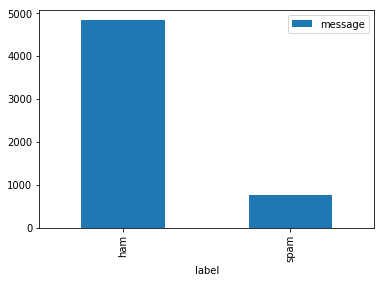

In [4]:
plot_count = rfe.getDF().groupby('label').count()
fig = plt.figure()
pt = plot_count.plot(kind='bar')

In [5]:
rfe.addLengthCol()
rfe.getDF().head(5)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ba932e8>,
      dtype=object)

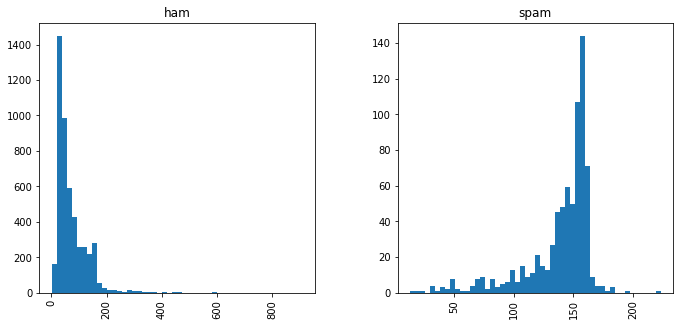

In [6]:
rfe.getDF().hist(column='length', by='label', bins=50,figsize=(11,5))

## Text processing (Vectorizing)

In [7]:
dfVC = rfe.getDF()['message'].apply(rfe.textVectorize)

In [8]:
dfVC.head(5)

0    Go jurong point crazy Available bugis n great ...
1                              Ok lar Joking wif u oni
2    Free entry 2 wkly comp win FA Cup final tkts 2...
3                  U dun say early hor U c already say
4          Nah dont think goes usf lives around though
Name: message, dtype: object

In [9]:
vectorizer = TfidfVectorizer("english")
feature_vector = vectorizer.fit_transform(dfVC)

## Apply Classifier and Make Prediction

In [10]:
train, test, labels_train, labels_test = train_test_split(feature_vector, rfe.getDF()['label'], test_size=0.25, random_state=100)

In [15]:
random_forest_classifier = RandomForestClassifier(n_estimators=31, random_state=111,max_features='auto')

In [16]:
modelRF = rfe.train(random_forest_classifier, train, labels_train)
pred = rfe.predict_labels(modelRF,test)
predicted_scores = accuracy_score(labels_test,pred)

In [17]:
print("Model Accuracy is : {}".format(predicted_scores))

Model Accuracy is : 0.9712849964106246


In [43]:
# RF
pred_scores1 = []
for i in range(2,200):
    random_forest_classifier = RandomForestClassifier(n_estimators=i, random_state=100 ,max_features='auto')
    modelRF = rfe.train(random_forest_classifier, train, labels_train)
    pred = rfe.predict_labels(modelRF,test)
    predicted_scores = accuracy_score(labels_test,pred)
    pred_scores1.append((i, [predicted_scores]))

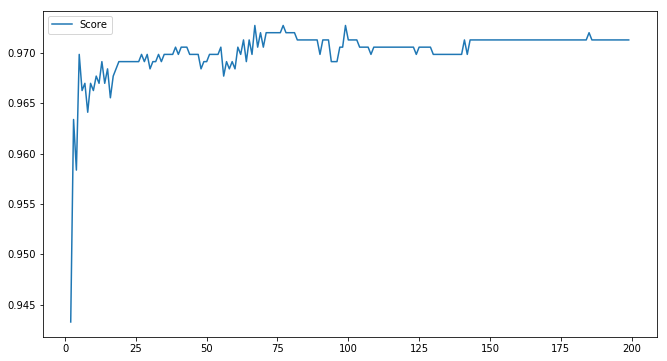

In [55]:
df = pd.DataFrame.from_dict(dict(pred_scores1),orient='index', columns=['Score'])
ax2 = df.plot(figsize=(11,6))

In [22]:
pred_scores2 = []
for i in range(2,200):
    random_forest_classifier = RandomForestClassifier(n_estimators=i, random_state=100 ,max_features='log2')
    modelRF = rfe.train(random_forest_classifier, train, labels_train)
    pred = rfe.predict_labels(modelRF,test)
    predicted_scores = accuracy_score(labels_test,pred)
    pred_scores2.append((i, [predicted_scores]))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


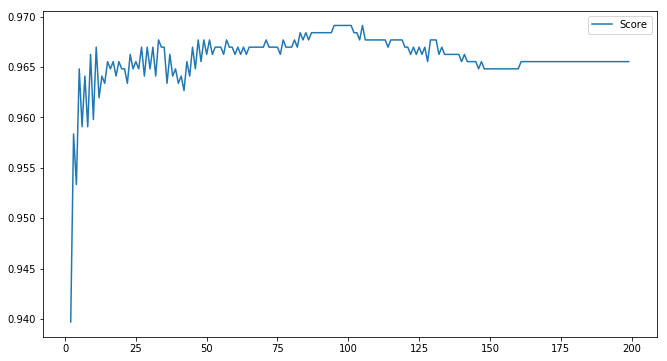

In [23]:
df2 = pd.DataFrame.from_dict(dict(pred_scores2),orient='index', columns=['Score'])
ax = df2.plot(figsize=(11,6))

In [24]:
pred_scores3 = []
for i in range(2,200):
    random_forest_classifier = RandomForestClassifier(n_estimators=i, random_state=100 ,max_features=None)
    modelRF = rfe.train(random_forest_classifier, train, labels_train)
    pred = rfe.predict_labels(modelRF,test)
    predicted_scores = accuracy_score(labels_test,pred)
    pred_scores3.append((i, [predicted_scores]))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


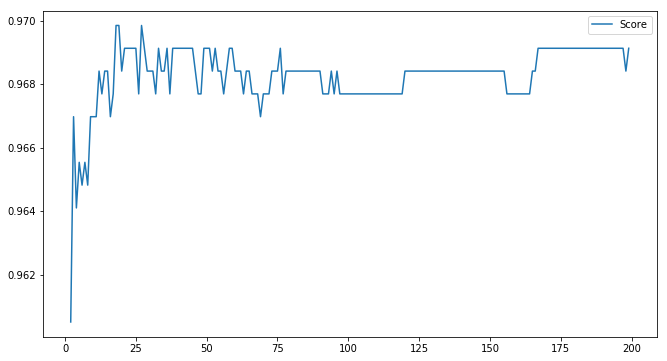

In [25]:
df3 = pd.DataFrame.from_dict(dict(pred_scores3),orient='index', columns=['Score'])
ax3 = df3.plot(figsize=(11,6))

## Comparing The Graphs

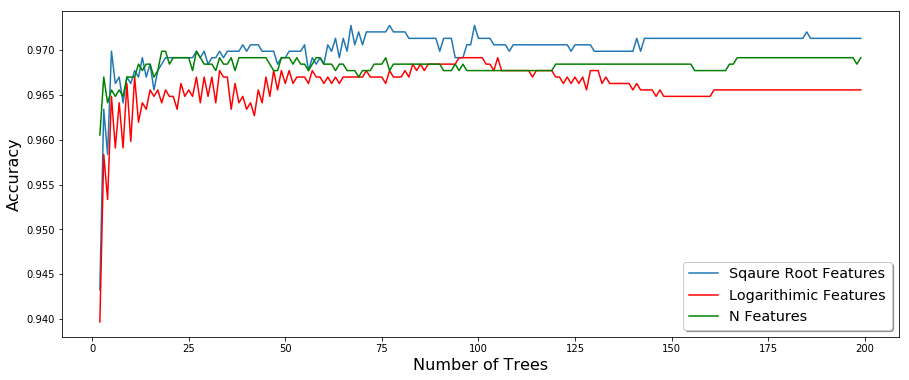

In [56]:
# comparision Graph
df.rename(columns={'Score':'Sqaure Root Features'}, inplace=True)
df2.rename(columns={'Score':'Logarithimic Features'}, inplace=True)
df3.rename(columns={'Score':'N Features'}, inplace=True)
ax = df.plot( kind="line",figsize=(15,6))
df2.plot(kind="line", ax=ax, color="red",figsize=(15,6))
df3.plot(kind="line", ax=ax, color="green",figsize=(15,6))
plt.xlabel('Number of Trees', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
ax.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.show()

In [57]:
# RF
pred_scores4 = []
for i in range(10,200):
    random_forest_classifier = RandomForestClassifier(n_estimators=31, max_depth=i, random_state=100 ,max_features='auto')
    modelRF = rfe.train(random_forest_classifier, train, labels_train)
    pred = rfe.predict_labels(modelRF,test)
    predicted_scores = accuracy_score(labels_test,pred)
    pred_scores4.append((i, [predicted_scores]))

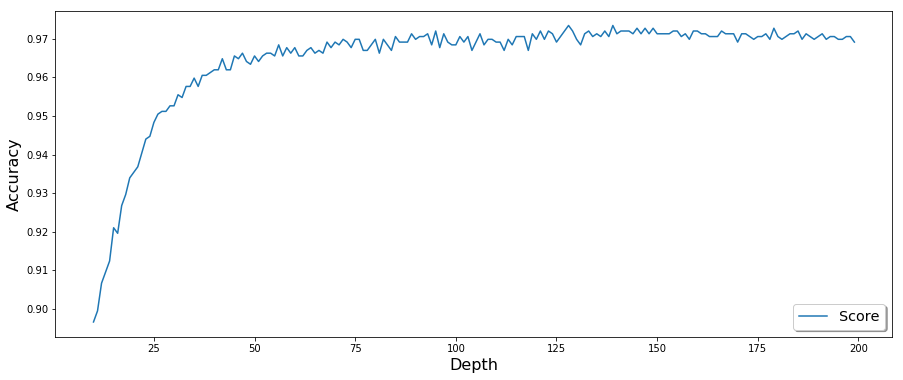

In [62]:
df4 = pd.DataFrame.from_dict(dict(pred_scores4),orient='index', columns=['Score'])
ax4 = df4.plot(figsize=(15,6))
plt.xlabel('Depth', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
ax4.legend(loc='lower right', shadow=True, fontsize='x-large')

In [73]:
# RF
pred_scores5 = []
criterion_list = ['gini','entropy']

for c in criterion_list:
    random_forest_classifier = RandomForestClassifier(n_estimators=31, criterion = c, random_state=100 ,max_features='auto')
    modelRF = rfe.train(random_forest_classifier, train, labels_train)
    pred = rfe.predict_labels(modelRF,test)
    predicted_scores = accuracy_score(labels_test,pred)
    pred_scores5.append((c, [predicted_scores]))

In [74]:
df5 = pd.DataFrame.from_dict(dict(pred_scores5),orient='index', columns=['Score'])
df5

,Score
gini,0.969131
entropy,0.966260
